In [160]:
import os, shutil

origin_dir = 'C:/Users/Lee/Downloads/dogs-vs-cats'
base_dir = 'C:/Users/Lee/Downloads/cats_and_dogs_small'
try:
    os.mkdir(base_dir)
except:
    pass

train_dir = os.path.join(base_dir, 'trian')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')
try:
    os.mkdir(train_dir)
    os.mkdir(test_dir)
    os.mkdir(val_dir)
except:
    pass

train_dog_dir = os.path.join(train_dir, 'dogs')
train_cat_dir = os.path.join(train_dir, 'cats')

test_dog_dir = os.path.join(test_dir, 'dogs')
test_cat_dir = os.path.join(test_dir, 'cats')

val_dog_dir = os.path.join(val_dir, 'dogs')
val_cat_dir = os.path.join(val_dir, 'cats')
try:
    os.mkdir(train_dog_dir)
    os.mkdir(train_cat_dir)
    os.mkdir(test_dog_dir)
    os.mkdir(test_cat_dir)
    os.mkdir(val_dog_dir)
    os.mkdir(val_cat_dir)
except:
    pass

fnames = [f'cat.{i}.jpg' for i in range(1000)]
for fname in fnames:
    src = os.path.join(origin_dir, fname)
    dst = os.path.join(train_cat_dir, fname)
    shutil.copyfile(src, dst)


fnames = [f'cat.{i}.jpg' for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(origin_dir, fname)
    dst = os.path.join(val_cat_dir, fname)
    shutil.copyfile(src, dst)

fnames = [f'cat.{i}.jpg' for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(origin_dir, fname)
    dst = os.path.join(test_cat_dir, fname)
    shutil.copyfile(src, dst)



fnames = [f'dog.{i}.jpg' for i in range(1000)]
for fname in fnames:
    src = os.path.join(origin_dir, fname)
    dst = os.path.join(train_dog_dir, fname)
    shutil.copyfile(src, dst)

fnames = [f'dog.{i}.jpg' for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(origin_dir, fname)
    dst = os.path.join(val_dog_dir, fname)
    shutil.copyfile(src, dst)

fnames = [f'dog.{i}.jpg' for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(origin_dir, fname)
    dst = os.path.join(test_dog_dir, fname)
    shutil.copyfile(src, dst)


In [162]:
import tensorflow.keras as KERAS

model = KERAS.models.Sequential(
    [
        KERAS.layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)),
        KERAS.layers.MaxPool2D((2, 2)),

        KERAS.layers.Conv2D(32, (3, 3), activation='relu'),
        KERAS.layers.MaxPool2D((2, 2)),


        KERAS.layers.Flatten(), 

        KERAS.layers.Dense(64, activation='relu'), 
        KERAS.layers.Dense(1, activation='sigmoid')

    ]
)

model.summary()


Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
flatten_28 (Flatten)         (None, 41472)             0         
_________________________________________________________________
dense_56 (Dense)             (None, 64)                2654272   
_________________________________________________________________
dense_57 (Dense)             (None, 1)               

In [163]:
model.compile(
    loss=KERAS.losses.BinaryCrossentropy(), 
    optimizer=KERAS.optimizers.RMSprop(),
    metrics=[KERAS.metrics.BinaryAccuracy()]
)

In [164]:
train_datagen = KERAS.preprocessing.image.ImageDataGenerator(rescale=1./255)
val_datagen = KERAS.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir, 
    target_size=(150, 150), 
    batch_size=20, 
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir, 
    target_size=(150, 150), 
    batch_size=20, 
    class_mode='binary'
)

for data, label in train_generator:
    print(data.shape)
    print(label.shape)
    break

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
(20, 150, 150, 3)
(20,)


In [166]:
history = model.fit_generator(
    train_generator, 
    steps_per_epoch=10, 
    epochs=5, 
    validation_data=val_generator, 
    validation_steps=50
)
model.save('cat_and_dog.h5')

Epoch 1/5
 1/10 [==>...........................] - ETA: 0s - loss: 0.6737 - binary_accuracy: 0.5500

c:\Users\Lee\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


10/10 [==============================] - 3s 302ms/step - loss: 0.6683 - binary_accuracy: 0.5950 - val_loss: 0.7088 - val_binary_accuracy: 0.5530
Epoch 2/5
10/10 [==============================] - 3s 314ms/step - loss: 0.8778 - binary_accuracy: 0.6500 - val_loss: 0.6678 - val_binary_accuracy: 0.5880
Epoch 3/5
10/10 [==============================] - 3s 307ms/step - loss: 0.6648 - binary_accuracy: 0.5900 - val_loss: 0.6651 - val_binary_accuracy: 0.5800
Epoch 4/5
10/10 [==============================] - 3s 284ms/step - loss: 0.6848 - binary_accuracy: 0.6850 - val_loss: 0.6741 - val_binary_accuracy: 0.5820
Epoch 5/5
10/10 [==============================] - 2s 267ms/step - loss: 0.6494 - binary_accuracy: 0.6300 - val_loss: 0.6515 - val_binary_accuracy: 0.5810


In [82]:
conv_base = KERAS.applications.VGG16(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3))

conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [85]:
import numpy as np
datagen = KERAS.preprocessing.image.ImageDataGenerator(rescale=1./255)
batch_size = 20
def extract_features(dir, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        dir, 
        target_size=(150, 150), 
        batch_size=batch_size, 
        class_mode='binary'
    )
    i = 0 
    for input_batch, label_batch in generator:
        features_batch = conv_base.predict(input_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = label_batch
        i += 1 
        if i * batch_size >= sample_count:
            break 
    return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
val_features, validation_labels = extract_features(val_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [88]:
print(train_features.shape)
print(train_labels.shape)

(2000, 4, 4, 512)
(2000,)


In [93]:
model = KERAS.models.Sequential(
    [
        KERAS.layers.InputLayer(input_shape=(4, 4, 512)), 
        KERAS.layers.Flatten(), 
        KERAS.layers.Dense(128, activation='relu'),
        KERAS.layers.Dropout(0.5), 
        KERAS.layers.Dense(1, activation='sigmoid')
    ]
)

model.compile(
    optimizer=KERAS.optimizers.RMSprop(), 
    loss=KERAS.losses.BinaryCrossentropy(), 
    metrics=[KERAS.metrics.BinaryAccuracy()]
)

In [96]:
history = model.fit(
    train_features, train_labels, 
    steps_per_epoch=100,
    epochs=10, 
    validation_data=(val_features, validation_labels)
)

Epoch 1/10
100/100 [==============================] - 1s 11ms/step - loss: 0.1551 - binary_accuracy: 0.9370 - val_loss: 0.4058 - val_binary_accuracy: 0.8600
Epoch 2/10
100/100 [==============================] - 1s 8ms/step - loss: 0.1381 - binary_accuracy: 0.9465 - val_loss: 0.3238 - val_binary_accuracy: 0.8980
Epoch 3/10
100/100 [==============================] - 1s 8ms/step - loss: 0.1219 - binary_accuracy: 0.9530 - val_loss: 0.3244 - val_binary_accuracy: 0.9040
Epoch 4/10
100/100 [==============================] - 1s 8ms/step - loss: 0.1275 - binary_accuracy: 0.9500 - val_loss: 0.3415 - val_binary_accuracy: 0.8980
Epoch 5/10
100/100 [==============================] - 1s 8ms/step - loss: 0.1089 - binary_accuracy: 0.9540 - val_loss: 0.3439 - val_binary_accuracy: 0.9010
Epoch 6/10
100/100 [==============================] - 1s 8ms/step - loss: 0.1063 - binary_accuracy: 0.9550 - val_loss: 0.3523 - val_binary_accuracy: 0.8990
Epoch 7/10
100/100 [==============================] - 1s 9ms/st

In [104]:
model = KERAS.models.Sequential(
    [
        conv_base, 
        KERAS.layers.Flatten(), 
        KERAS.layers.Dense(128, activation='relu'), 
        KERAS.layers.Dense(1, activation='sigmoid')
    ]
)
model.summary()
conv_base.trainable = True
print(len(model.trainable_weights))
conv_base.trainable = False
print(len(model.trainable_weights))

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_20 (Flatten)         (None, 8192)              0         
_________________________________________________________________
dense_40 (Dense)             (None, 128)               1048704   
_________________________________________________________________
dense_41 (Dense)             (None, 1)                 129       
Total params: 15,763,521
Trainable params: 1,048,833
Non-trainable params: 14,714,688
_________________________________________________________________
30
4


In [148]:
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    layer.trainable = bool(set_trainable)
model = KERAS.models.Sequential(
    [
        conv_base, 
        KERAS.layers.Flatten(), 
        KERAS.layers.Dense(128, activation='relu'), 
        KERAS.layers.Dense(1, activation='sigmoid')
    ]
)

model.summary()
print(len(model.trainable_weights))



model.compile(
    optimizer=KERAS.optimizers.RMSprop(), 
    loss=KERAS.losses.BinaryCrossentropy(), 
    metrics=[KERAS.metrics.BinaryAccuracy()]
)


history = model.fit_generator(
    train_generator, 
    steps_per_epoch=10, 
    epochs=5, 
    validation_data=val_generator, 
    validation_steps=50
)


Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_26 (Flatten)         (None, 8192)              0         
_________________________________________________________________
dense_52 (Dense)             (None, 128)               1048704   
_________________________________________________________________
dense_53 (Dense)             (None, 1)                 129       
Total params: 15,763,521
Trainable params: 8,128,257
Non-trainable params: 7,635,264
_________________________________________________________________
10
Epoch 1/5


c:\Users\Lee\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


10/10 [==============================] - 4s 386ms/step - loss: 1.5613 - binary_accuracy: 0.5100 - val_loss: 0.6747 - val_binary_accuracy: 0.6380
Epoch 2/5
10/10 [==============================] - 3s 364ms/step - loss: 0.7489 - binary_accuracy: 0.5800 - val_loss: 0.7281 - val_binary_accuracy: 0.5360
Epoch 3/5
10/10 [==============================] - 4s 379ms/step - loss: 0.7714 - binary_accuracy: 0.4750 - val_loss: 0.6547 - val_binary_accuracy: 0.5810
Epoch 4/5
10/10 [==============================] - 3s 367ms/step - loss: 0.7148 - binary_accuracy: 0.6500 - val_loss: 0.6047 - val_binary_accuracy: 0.7490
Epoch 5/5
10/10 [==============================] - 3s 354ms/step - loss: 0.6085 - binary_accuracy: 0.6800 - val_loss: 0.6408 - val_binary_accuracy: 0.7090


In [150]:
test_datagen = KERAS.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir, 
    target_size = (150, 150), 
    batch_size = 20, 
    class_mode='binary'
)

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print(test_acc)

model.save('test_model.h5')

Found 1000 images belonging to 2 classes.
0.7160000205039978


(1, 150, 150, 3)


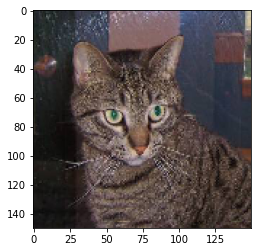

In [175]:
import matplotlib.pyplot as plt 
img_path = os.path.join(train_cat_dir, 'cat.1.jpg')
img = KERAS.preprocessing.image.load_img(img_path, target_size=(150, 150))
img_tensor = KERAS.preprocessing.image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255 
print(img_tensor.shape)

plt.imshow(img_tensor[0])
plt.show()

In [188]:
model = KERAS.models.load_model('cat_and_dog.h5')
layer_outputs = [layer.output for layer in model.layers[:]]
activation_model = KERAS.models.Model(inputs=model.input, outputs=layer_outputs)

activations = activation_model.predict(img_tensor)
print(activations[0].shape)


(1, 148, 148, 32)
